Write your post here.

![](/images/basic_synth_arch.jpg#centerme)

## Preparing The Oscillators

### Importing Necessary Modules

In [3]:
import pandas as pd
import numpy as np
from scipy.fftpack import fft, fftfreq
import IPython.display as ipd
import matplotlib.pyplot as plt
from synthesizer import Waveform, Oscillator
from synthesizer.frequency import frequency_from_scale

### Define The Oscillators

In [9]:
sine_osc = Oscillator(waveform=Waveform.sine, volume=0.05)
square_osc = Oscillator(waveform=Waveform.square, volume=0.05)
sawtooth_osc = Oscillator(waveform=Waveform.sawtooth, volume=0.05)
triangle_osc = Oscillator(waveform=Waveform.triangle, volume=0.05)

### Audio and Plot

In [4]:
sr = 44100 # Sample Rate in Hz
plot_args = {"figsize": (6, 4), "legend": False} # Plot arguments

def play_and_plot_wave(oscillator: Oscillator, note: str = "C4", duration: float = 2.0) -> None:
    frequency = frequency_from_scale(note)
    phases = np.cumsum(2.0 * np.pi * frequency / sr * np.ones(int(sr * float(duration))))
    wave = oscillator.generate_wave(phases)
    yf = fft(wave)
    xf = fftfreq(len(wave)) * sr

    fig, (axis1, axis2) = plt.subplots(2, 1, constrained_layout=True)
    axis1.set_title('Signal', fontsize=12)
    axis1.set_yticks([])
    axis2.set_title('FFT', fontsize=12)
    axis2.set_yticks([])
    axis2.set_xticks(np.arange(1, 11) * frequency)

    fft_df = pd.DataFrame({"Frequency": xf, "Magnitude": np.abs(yf)})
    wave_df = pd.DataFrame({"Time": np.arange(5, len(wave)+ 5) * (1000 / sr), "Amplitude": wave})
    wave_df.plot(x="Time", y="Amplitude", xlabel="Time (ms)", xlim=(0, 20), ax=axis1, **plot_args)
    xlim2 = (frequency / 2, frequency * 10)
    fft_df.plot(x="Frequency", y="Magnitude", xlabel="Frequency (Hz)", xlim=xlim2, ax=axis2, **plot_args)

    display(ipd.Audio(wave, rate=sr, normalize=False))

## Analyze The Waves

### Sine Wave

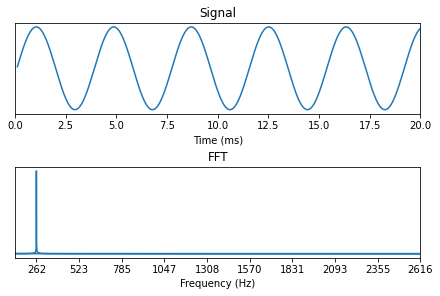

In [5]:
play_and_plot_wave(sine_osc)

### Square Wave

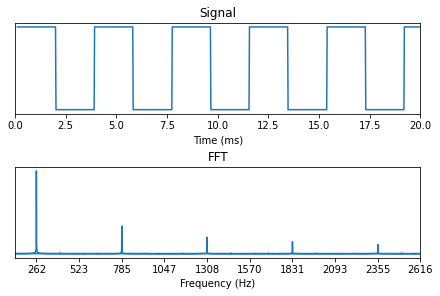

In [6]:
play_and_plot_wave(square_osc)

### Sawtooth Wave

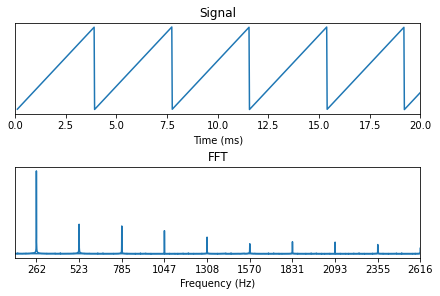

In [7]:
play_and_plot_wave(sawtooth_osc)

### Triangle Wave

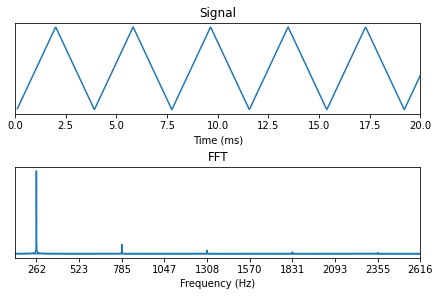

In [8]:
play_and_plot_wave(triangle_osc)
